# Clasificador Naive Bayes

## Los datos
Utilizaremos el famoso [conjunto de datos de flores de iris] (http://en.wikipedia.org/wiki/Iris_flower_data_set).

El conjunto de datos de la flor Iris o el conjunto de datos Iris de Fisher es un conjunto de datos multivariado introducido por Sir Ronald Fisher en 1936 como un ejemplo de análisis discriminante.

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor), por lo que contiene 150 muestras en total. Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros.

## Cargar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Cargar datos

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris.target[:5]

array([0, 0, 0, 0, 0])

## Transformar datos:

In [5]:
X = iris.data[:,[2,3]]
Y = iris.target

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Creando el modelo

In [8]:
nb = GaussianNB()

In [9]:
nb.fit(X_train_std, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Metricas

In [10]:
print(f"Accuracy:{accuracy_score(Y_test, nb.predict(X_test_std))}")

Accuracy:0.9777777777777777


In [11]:
print(f"Confusion matrix: \n{confusion_matrix(Y_test, nb.predict(X_test_std))}")

Confusion matrix: 
[[19  0  0]
 [ 0  9  1]
 [ 0  0 16]]


In [12]:
print(f"Classification report:\n{classification_report(Y_test, nb.predict(X_test_std))}")

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Validación cruzada

In [13]:
cross_val_score(nb, iris.data, iris.target, scoring="accuracy", cv=10)

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [14]:
cross_val_score(nb, iris.data, iris.target, scoring="accuracy", cv=10).mean()

0.9533333333333334

## Visualizando los datos

In [15]:
import Plotting_Decision_Boundaries as db

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))

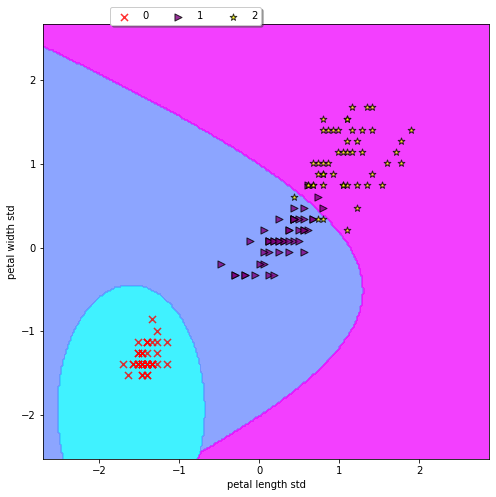

In [17]:
db.plotting_db(X=X_combined_std, y=y_combined, classifier=nb)

## Reference:

http://scikit-learn.org/stable/modules/naive_bayes.html